In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_test = np.load('../data/test_Euclid_res_id_001.npy', allow_pickle=True)[()]
dataset_train_2000 = np.load('../data/train_Euclid_res_2000_TrainStars_id_001.npy', allow_pickle=True)[()]
dataset_train_200 = np.load('../data/train_Euclid_res_200_TrainStars_id_001.npy', allow_pickle=True)[()]

(2400, 32, 32)


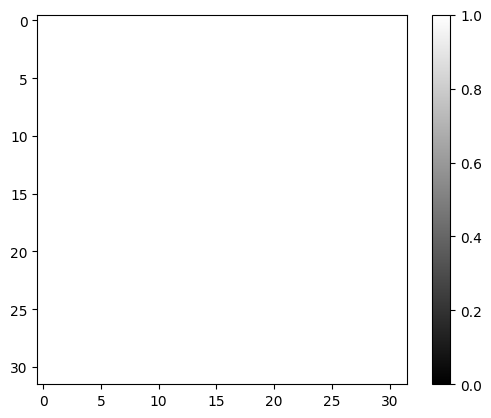

In [4]:
shape = dataset_test['stars'][0].shape

masks = np.ones((2400, shape[0], shape[1]))
print(masks.shape)

plt.imshow(masks[0], cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [5]:
dataset_train_2000.keys()

dict_keys(['stars', 'noisy_stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters'])

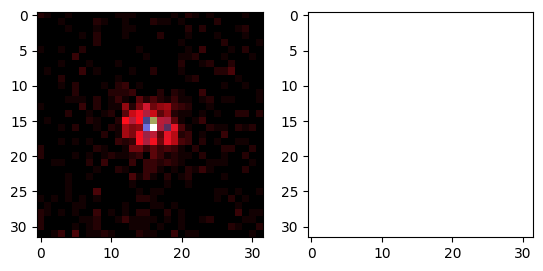

In [7]:
idx = np.random.randint(0, 2000)
# Add masks to the dataset
plt.subplot(1, 2, 1)
plt.imshow(dataset_train_2000['noisy_stars'][idx]*masks[idx], vmin=0, cmap='gist_stern')
plt.subplot(1, 2, 2)
plt.imshow(masks[idx], cmap='gray', vmin=0, vmax=1)
plt.show()

In [8]:
masked_stars = np.array([star*masks[idx] for idx, star in enumerate(dataset_train_2000['stars'])])
masked_noisy_stars = np.array([star*masks[idx] for idx, star in enumerate(dataset_train_2000['noisy_stars'])])

In [9]:
dataset_train_2000['stars'] = masked_stars
dataset_train_2000['noisy_stars'] = masked_noisy_stars
dataset_train_2000['masks'] = masks[:2000]

np.save('../data/train_Euclid_res_2000_TrainStars_unit_masked_id_001.npy', dataset_train_2000)

dataset_train_200['stars'] = masked_stars[:200]
dataset_train_200['noisy_stars'] = masked_noisy_stars[:200]
dataset_train_200['masks'] = masks[:200]

np.save('../data/train_Euclid_res_200_TrainStars_unit_masked_id_001.npy', dataset_train_200)

In [10]:
dataset_test.keys()

dict_keys(['stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters'])

In [11]:
masked_test_stars = np.array([star*masks[idx] for idx, star in enumerate(dataset_test['stars'])])

In [12]:
len(masks[-400:])

400

In [13]:
dataset_test['stars'] = masked_test_stars
dataset_test['masks'] = masks[2000:]

np.save('../data/test_Euclid_res_unit_masked_id_001.npy', dataset_test)

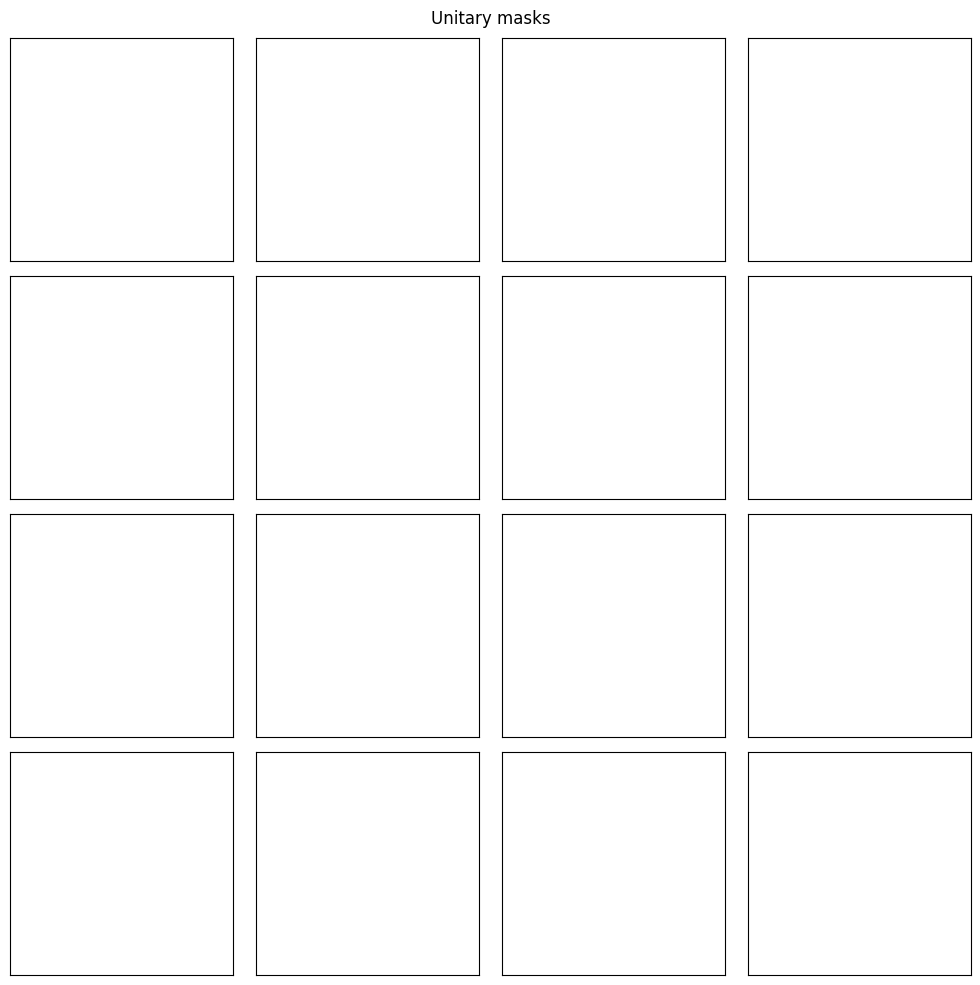

In [18]:
# Plot a bunch of masks
plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.randint(0, 2400, 16)):
    plt.subplot(4, 4, i+1)
    plt.imshow(masks[idx], cmap='gray', vmin=0, vmax=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.suptitle('Unitary masks')
plt.tight_layout()
plt.show()